## Finding Arduino Ports
When working with Arduino, it's essential to know which port your Arduino board is connected to on your computer. This is necessary for uploading code and communicating with the board. Each port is identified by a unique name or number, depending on the operating system:

- On Windows, ports are named like `COM3`, `COM4`, etc.
- On macOS and Linux, ports are named like `/dev/ttyUSB0`, `/dev/ttyACM0`, etc.

Run the next cell to know the port number.


In [34]:
import serial.tools.list_ports

def list_all_ports():
    ports = serial.tools.list_ports.comports()

    if not ports:
        print("No serial ports found.")
    else:
        print("Available serial ports:")
        for port in ports:
            print(f"Port: {port.device}, Description: {port.description}")

list_all_ports()

Available serial ports:
Port: COM5, Description: USB Serial Device (COM5)
Port: COM4, Description: Intel(R) Active Management Technology - SOL (COM4)


#### Setup the serial communication with arduino

Change the port value in the next cell with the result that you got in the previous cell

In [ ]:
pip install pyserial

# Below shown is the diode data measurement setup:
![diode data measurement setup](diode_image.jpg)

A differential amplifier is designed to measure the voltage difference between two points. As shown in the image, the A2 analog pin of the Arduino, which is connected to the differential amplifier, measures the voltage drop across the resistor.



Applying voltage and reading output:

Input Voltage (V)         Resistor Voltage (V)     
Arduino Response: DAC Set to: 0.000
0.000000 V  0.006000 V
Arduino Response: DAC Set to: 0.017
0.016500 V  0.003000 V
Arduino Response: DAC Set to: 0.033
0.033000 V  0.006000 V
Arduino Response: DAC Set to: 0.050
0.049500 V  0.000000 V
Arduino Response: DAC Set to: 0.066
0.066000 V  0.000000 V
Arduino Response: DAC Set to: 0.083
0.082500 V  0.003000 V
Arduino Response: DAC Set to: 0.099
0.099000 V  0.006000 V
Arduino Response: DAC Set to: 0.116
0.115500 V  0.000000 V
Arduino Response: DAC Set to: 0.132
0.132000 V  0.006000 V
Arduino Response: DAC Set to: 0.149
0.148500 V  0.006000 V
Arduino Response: DAC Set to: 0.165
0.165000 V  0.006000 V
Arduino Response: DAC Set to: 0.181
0.181500 V  0.006000 V
Arduino Response: DAC Set to: 0.198
0.198000 V  0.003000 V
Arduino Response: DAC Set to: 0.214
0.214500 V  0.000000 V
Arduino Response: DAC Set to: 0.231
0.231000 V  0.006000 V
Arduino Response: DAC Se

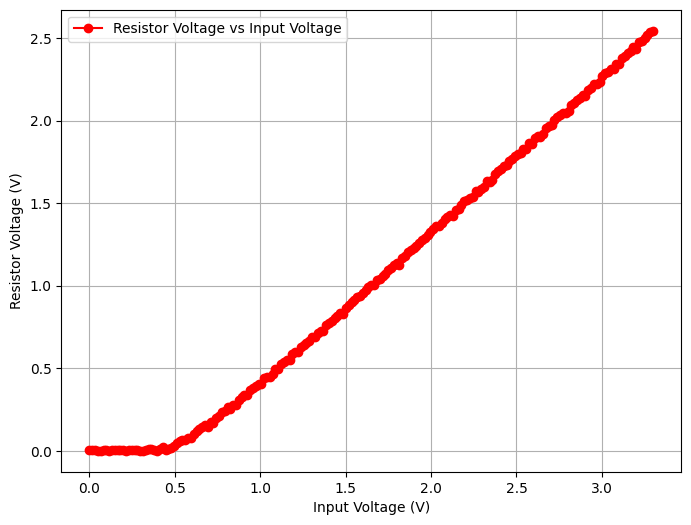

In [99]:
import serial
import time
import matplotlib.pyplot as plt

# Serial Port Configuration
SERIAL_PORT = "COM5"  # Update based on your system
BAUD_RATE = 115200  

# Constants
SERIES_RESISTOR = 1000  # Resistor value in Ohms
DAC_CONVERSION = 0.00165  # DAC step to voltage conversion

# Data storage for plotting
diode_voltages = []  
diode_currents = []  
input_voltages = []  
resistor_voltages = []  

def apply_voltage_and_read():
    """
    - Sends voltage steps to Arduino DAC
    - Reads ADC values for resistor voltage
    - Stores data for plotting
    """
    try:
        with serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=3) as ser:
            time.sleep(2)  
            
            print("\nApplying voltage and reading output:\n")
            print(f"{'Input Voltage (V)':<25} {'Resistor Voltage (V)':<25}")
            print("="*75)

            inc = 0  
            while inc <= 2000:  
                set_command = f"set_dac {inc}\n"
                ser.write(set_command.encode())  
                time.sleep(0.1)  

                response = ser.readline().decode("utf-8").strip()
                if not response:
                    print("⚠ Warning: No response from Arduino.")
                    continue

                print(f"Arduino Response: {response}")  

                ser.write(b"read_adc\n")
                time.sleep(0.1)

                response = ser.readline().decode("utf-8").strip()
                if not response:
                    print("⚠ Warning: No ADC response received.")
                    continue

                #print(f"Raw ADC Response: '{response}'")  

                try:
                    if response.replace(".", "").isdigit():
                        resistor_voltage = float(response.strip())  
                        input_voltage = inc * DAC_CONVERSION  

                        # **Ensure consistent list length**
                        if len(input_voltages) == len(resistor_voltages):
                            input_voltages.append(input_voltage)
                            resistor_voltages.append(resistor_voltage)
                        else:
                            print("⚠ Mismatch detected! Skipping this data point.")
                            continue  

                        print(f"{input_voltage:.6f} V  {resistor_voltage:.6f} V")

                    else:
                        print(f"⚠ Error: Invalid ADC response: {response}")
                        continue

                except ValueError:
                    print(f"⚠ Error: Unexpected response format: {response}")

                inc += 10  

            print("\nMeasurement complete. DAC reset to 0V.")
            ser.write(b"set_dac 0\n")
            time.sleep(0.05)

            # **Check List Lengths**
            print(f"\nFinal Data Lengths: Input Voltages = {len(input_voltages)}, Resistor Voltages = {len(resistor_voltages)}")

    except serial.SerialException as e:
        print(f"Error: {e}")

def plot_iv_curve():
    """
    Plots Resistor Voltage vs. Input Voltage.
    """
    if len(input_voltages) == len(resistor_voltages):
        plt.figure(figsize=(8, 6))
        plt.plot(input_voltages, resistor_voltages, marker='o', linestyle='-', color='r', label="Resistor Voltage vs Input Voltage")
        
        plt.xlabel("Input Voltage (V)")
        plt.ylabel("Resistor Voltage (V)")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"⚠ Error: List length mismatch! Input = {len(input_voltages)}, Resistor = {len(resistor_voltages)}")

if __name__ == "__main__":
    apply_voltage_and_read()
    plot_iv_curve()


# Assignment1 : Plot I-V curve of the diode

We have successfully measured the voltage across the resistor. Now, we need to determine the current flowing through the diode and plot its I-V curve. You are required to write only two lines of code to calculate diode_current and diode_voltage.


Applying voltage and reading output:

Input Voltage (V)         Diode Voltage (V)         Diode Current (A)        
Arduino Response: DAC Set to: 0.000
0.000000 V, 0.000000 V, 0.000000000 A
Arduino Response: DAC Set to: 0.017
0.016500 V, 0.016500 V, 0.000000000 A
Arduino Response: DAC Set to: 0.033
0.033000 V, 0.033000 V, 0.000000000 A
Arduino Response: DAC Set to: 0.050
0.049500 V, 0.046500 V, 0.000003000 A
Arduino Response: DAC Set to: 0.066
0.066000 V, 0.060000 V, 0.000006000 A
Arduino Response: DAC Set to: 0.083
0.082500 V, 0.082500 V, 0.000000000 A
Arduino Response: DAC Set to: 0.099
0.099000 V, 0.099000 V, 0.000000000 A
Arduino Response: DAC Set to: 0.116
0.115500 V, 0.115500 V, 0.000000000 A
Arduino Response: DAC Set to: 0.132
0.132000 V, 0.126000 V, 0.000006000 A
Arduino Response: DAC Set to: 0.149
0.148500 V, 0.145500 V, 0.000003000 A
Arduino Response: DAC Set to: 0.165
0.165000 V, 0.165000 V, 0.000000000 A
Arduino Response: DAC Set to: 0.181
0.181500 V, 0.175500 V, 0.0000060

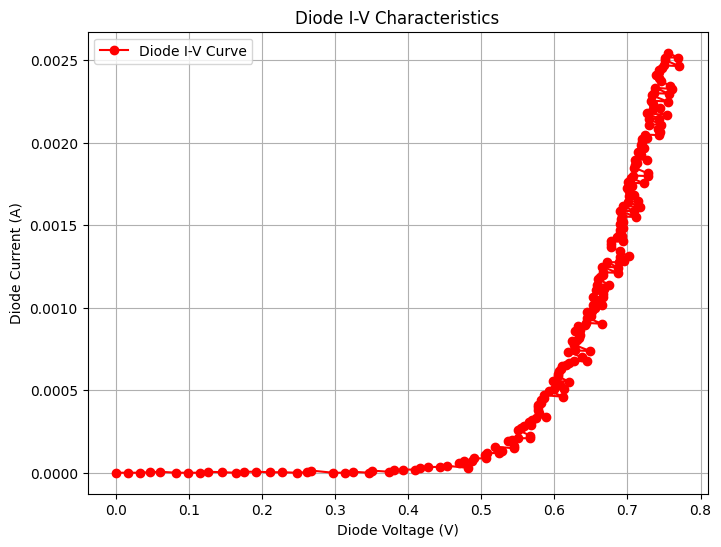

In [98]:
import serial
import time
import matplotlib.pyplot as plt

# Serial Port Configuration
SERIAL_PORT = "COM5"  # Update based on your system
BAUD_RATE = 115200  

# Constants
SERIES_RESISTOR = 1000  # Resistor value in Ohms
DAC_CONVERSION = 0.00165  # DAC step to voltage conversion

# Data storage for plotting
diode_voltages = []  # Voltage across the diode
diode_currents = []  # Current through the diode
input_voltages = []  # Store input voltage (for debugging)

def apply_voltage_and_read():
    """
    - Sends voltage steps to Arduino DAC
    - Reads ADC values for diode voltage
    - Computes diode current
    - Stores data for plotting I-V curve
    """
    try:
        with serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=3) as ser:
            time.sleep(2)  # Allow time for serial connection
            
            print("\nApplying voltage and reading output:\n")
            print(f"{'Input Voltage (V)':<25} {'Diode Voltage (V)':<25} {'Diode Current (A)':<25}")
            print("="*75)

            inc = 0  # Start from 0V
            while inc <= 2000:  # DAC max value for 3.3V
                # Send command to set DAC voltage
                set_command = f"set_dac {inc}\n"
                ser.write(set_command.encode())  
                time.sleep(0.1)  # Allow voltage to settle

                # Read confirmation response
                response = ser.readline().decode("utf-8").strip()
                if not response:
                    print("⚠ Warning: No response from Arduino.")
                    continue

                print(f"Arduino Response: {response}")  # Debugging: Show what Arduino sends

                # Request ADC reading
                ser.write(b"read_adc\n")
                time.sleep(0.1)

                # Read ADC response
                response = ser.readline().decode("utf-8").strip()
                if not response:
                    print("⚠ Warning: No ADC response received.")
                    continue

                #print(f"Raw ADC Response: '{response}'")  # Debugging: Show raw Arduino response

                try:
                    # Extract the resistor voltage from ADC response
                    resistor_voltage = float(response.strip())  

                    # Compute input voltage applied (based on DAC value)
                    input_voltage = inc * DAC_CONVERSION  

                    # Compute diode voltage and diode current
                    diode_voltage = ??????????????

                    diode_current = ?????????????? 

                    # Store data for plotting
                    diode_voltages.append(diode_voltage)
                    diode_currents.append(diode_current)
                    input_voltages.append(input_voltage)

                    # Print the values
                    print(f"{input_voltage:.6f} V, {diode_voltage:.6f} V, {diode_current:.9f} A")

                except ValueError:
                    print(f"⚠ Error: Unexpected response format: {response}")

                inc += 10  # Increase voltage step

            print("\nMeasurement complete. DAC reset to 0V.")

            # Reset DAC to 0V
            ser.write(b"set_dac 0\n")
            time.sleep(0.05)

    except serial.SerialException as e:
        print(f"Error: {e}")

def plot_iv_curve():
    """
    Plots the I-V curve (Diode Current vs. Diode Voltage) without log scale
    """
    if not diode_voltages or not diode_currents:
        print("⚠ Error: No valid data to plot!")
        return

    plt.figure(figsize=(8, 6))
    plt.plot(diode_voltages, diode_currents, marker='o', linestyle='-', color='r', label="Diode I-V Curve")
    
    plt.xlabel("Diode Voltage (V)")
    plt.ylabel("Diode Current (A)")
    plt.title("Diode I-V Characteristics")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    apply_voltage_and_read()
    plot_iv_curve()  # Call the function to plot the I-V curve


In [5]:
import serial
import time

port = 'COM5' 

ser = serial.Serial(port, 115200)

time.sleep(2)

Type your command:


>  m2d


Received stop command.


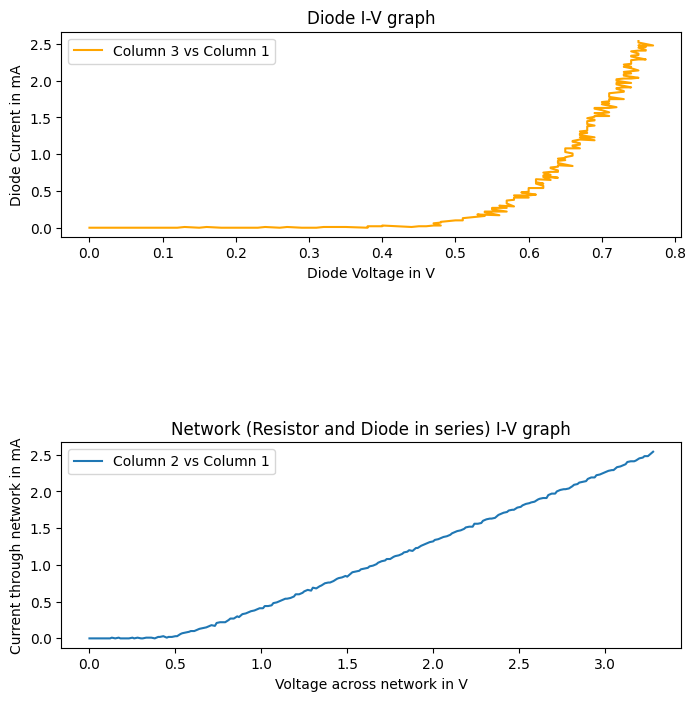

In [6]:
import matplotlib.pyplot as plt
import csv

read_data_from_csv = 0

# Initialize empty lists to store each column
resistor_voltage = []  # Current throught the resistor diode network in mA
dac_voltage = []
diode_voltage = []

if read_data_from_csv == 0:
    print("Type your command:")
    command = input("> ").strip()
    ser.write((command + '\n').encode())
    
    try:
        while True:
            # Read a line of data from the serial port
            if ser.in_waiting > 0:
                line = ser.readline().decode('utf-8').strip()
                
                # Check if the line contains "Ready to enter next command"
                if "Ready to enter next command" in line:
                    print("Received stop command.")
                    break
    
                # Split the line by commas
                values = line.split(',')
                # Check if we received exactly 3 values
                if len(values) == 3:
                    # Append each value to the respective list
                    resistor_voltage.append(float(values[0]))
                    dac_voltage.append(float(values[1]))
                    diode_voltage.append(float(values[2]))
    
                    # Print to verify (optional)
                    # print(f"Col1: {values[0]}, Col2: {values[1]}, Col3: {values[2]}")
    
    except KeyboardInterrupt:
        print("Data collection interrupted.")

else:
    with open('diode_data.csv', mode='r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            resistor_voltage.append(float(row[0])) 
            dac_voltage.append(float(row[1]))
            diode_voltage.append(float(row[2]))
    


plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)  # 
plt.plot(diode_voltage, resistor_voltage, label='Column 3 vs Column 1', color='orange')
plt.xlabel('Diode Voltage in V')
plt.ylabel('Diode Current in mA')
plt.title('Diode I-V graph')
plt.legend()

plt.subplot(2, 1, 2)  #
plt.plot(dac_voltage, resistor_voltage, label='Column 2 vs Column 1')
plt.xlabel('Voltage across network in V')
plt.ylabel('Current through network in mA')
plt.title('Network (Resistor and Diode in series) I-V graph')
plt.legend()



plt.subplots_adjust(hspace=1)


## Diode Curve Fitting part1
Note: Before running the next cell make sure that scipy is installed. Following is the command to do: `pip install scipy`

We first perform curve fitting without considering the effect of the resistor voltage drop on the diode voltage. Essentially, we fit the diode I-V curve to I vs. Vdac (input voltage) rather than I vs. Vdiode, where Vdiode is given by Vdiode = Vdac - Vresistor.

Fitted Parameters: I0 = 2.50e-17 A, n = 4.00


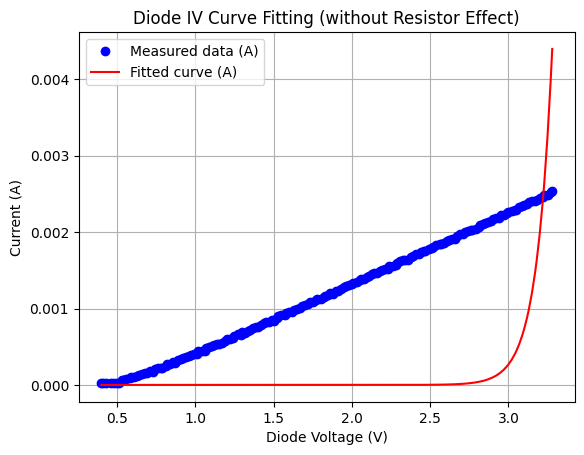

In [8]:
import numpy as np
from scipy.optimize import curve_fit

# Constants
Vt = 0.025  # Thermal voltage at room temperature (in Volts)
R = 1000  # 1kΩ resistor

# Diode equation to fit
def diode_equation(V_diode, I0, n):
    return I0 * (np.exp(V_diode / (n * Vt)) - 1)

def trim_data(voltage, current, voltage_threshold=0.2, current_threshold=0.01):
    """Trim the data to exclude very low voltage and current points."""
    voltage = np.array(voltage)
    current = np.array(current)
    
    # Only keep data where voltage > threshold and current > threshold
    mask = (voltage > voltage_threshold) & (current > current_threshold)
    return voltage[mask], current[mask]

def calculate_diode_voltage(voltage_measured, current):
    # Convert current from mA to A
    current_in_amps = current * 1e-3  # Convert mA to A
    
    # Calculate the diode voltage
    V_diode = voltage_measured 
    return V_diode

def fit_diode_equation(V_diode, current):
    """Fit the diode equation to the data and return the parameters."""
    # Convert current from mA to A
    current_in_amps = current * 1e-3  # Convert mA to A

    # Initial guess for the diode parameters: I0, n
    initial_guess = [1e-12, 1.5]

    # Set bounds to ensure realistic values (I0 > 0, 1 < n < 2)
    bounds = ([1e-20, 1], [1e-7, 4])

    # Perform curve fitting
    popt, pcov = curve_fit(diode_equation, V_diode, current_in_amps, p0=initial_guess, bounds=bounds, maxfev=10000)

    # Extract the fitted parameters
    I0, n = popt
    print(f"Fitted Parameters: I0 = {I0:.2e} A, n = {n:.2f}")

    return popt

def plot_fitted_data(V_diode, current, popt):
    """Plot the fitted curve against the measured data."""
    current_in_amps = current * 1e-3  # Convert mA to A for consistency in plot
    
    # Generate the fitted current from the fitted parameters
    I_fitted = diode_equation(V_diode, *popt)
    
    # Plot the measured and fitted data
    plt.plot(V_diode, current_in_amps, 'bo', label="Measured data (A)")
    plt.plot(V_diode, I_fitted, 'r-', label="Fitted curve (A)")
    plt.xlabel('Diode Voltage (V)')
    plt.ylabel('Current (A)')
    plt.title('Diode IV Curve Fitting (without Resistor Effect)')
    plt.grid(True)
    plt.legend()
    plt.show()

voltage = dac_voltage
current = resistor_voltage

# Trim the data to focus on the forward bias region and ignore small currents
voltage_trimmed, current_trimmed = trim_data(voltage, current, voltage_threshold=0.2, current_threshold=0.01)

# Calculate the diode voltage
V_diode_trimmed = calculate_diode_voltage(voltage_trimmed, current_trimmed)

# Fit the diode equation to the adjusted diode voltage
popt = fit_diode_equation(V_diode_trimmed, current_trimmed)

# Plot the fitted data and the measured data
plot_fitted_data(V_diode_trimmed, current_trimmed, popt)

Now, we perform curve fitting while accounting for the voltage drop across the resistor. This means we fit the diode I-V curve using Vdiode = Vdac - Vresistor, where Vdiode represents the actual voltage across the diode after subtracting the resistor's voltage drop.

Fitted Parameters: I0 = 1.00e-07 A, n = 2.94


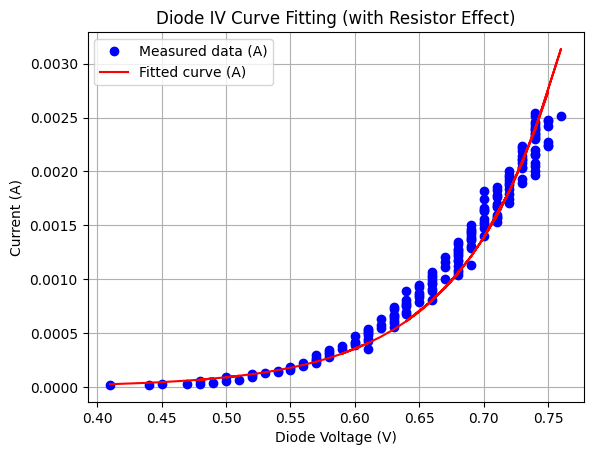

In [34]:
def calculate_diode_voltage(voltage_measured, current):
    """Calculate the diode voltage considering the resistor."""
    # Convert current from mA to A
    current_in_amps = current * 1e-3  # Convert mA to A
    
    # Calculate the diode voltage
    V_diode = voltage_measured - current_in_amps * R 
    return V_diode

voltage = dac_voltage
current = resistor_voltage

# Trim the data to focus on the forward bias region and ignore small currents
voltage_trimmed, current_trimmed = trim_data(voltage, current, voltage_threshold=0.2, current_threshold=0.01)

# Calculate the diode voltage
V_diode_trimmed = calculate_diode_voltage(voltage_trimmed, current_trimmed)

# Fit the diode equation to the adjusted diode voltage
popt = fit_diode_equation(V_diode_trimmed, current_trimmed)

# Plot the fitted data and the measured data
plot_fitted_data(V_diode_trimmed, current_trimmed, popt)

## Diode Curve Fitting part 2

Make sure to read data from 'csv' file rather from real hardware. Change the read_data_from_csv variable to value 1. 

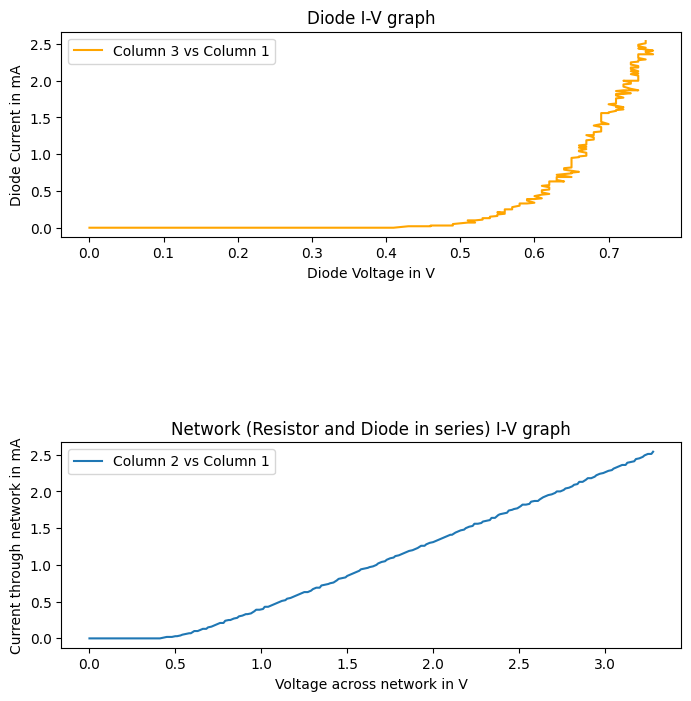

In [2]:
import matplotlib.pyplot as plt
import csv

read_data_from_csv = 1

# Initialize empty lists to store each column
resistor_voltage = []  # Current throught the resistor diode network in mA
dac_voltage = []
diode_voltage = []

if read_data_from_csv == 0:
    print("Type your command:")
    command = input("> ").strip()
    ser.write((command + '\n').encode())
    
    try:
        while True:
            # Read a line of data from the serial port
            if ser.in_waiting > 0:
                line = ser.readline().decode('utf-8').strip()
                
                # Check if the line contains "Ready to enter next command"
                if "Ready to enter next command" in line:
                    print("Received stop command.")
                    break
    
                # Split the line by commas
                values = line.split(',')
                # Check if we received exactly 3 values
                if len(values) == 3:
                    # Append each value to the respective list
                    resistor_voltage.append(float(values[0]))
                    dac_voltage.append(float(values[1]))
                    diode_voltage.append(float(values[2]))
    
                    #Print to verify (optional)
                    print(f"Col1: {values[0]}, Col2: {values[1]}, Col3: {values[2]}")
    
    except KeyboardInterrupt:
        print("Data collection interrupted.")

else:
    with open('diode_data.csv', mode='r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            resistor_voltage.append(float(row[0])) 
            dac_voltage.append(float(row[1]))
            diode_voltage.append(float(row[2]))
    


plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)  # 
plt.plot(diode_voltage, resistor_voltage, label='Column 3 vs Column 1', color='orange')
plt.xlabel('Diode Voltage in V')
plt.ylabel('Diode Current in mA')
plt.title('Diode I-V graph')
plt.legend()

plt.subplot(2, 1, 2)  #
plt.plot(dac_voltage, resistor_voltage, label='Column 2 vs Column 1')
plt.xlabel('Voltage across network in V')
plt.ylabel('Current through network in mA')
plt.title('Network (Resistor and Diode in series) I-V graph')
plt.legend()



plt.subplots_adjust(hspace=1)


Iteration: I0 = 1.00e-09, n = 3.00, RMSE = 1.31e-03
Iteration: I0 = 1.50e-07, n = 3.00, RMSE = 3.41e-04
Iteration: I0 = 1.25e-07, n = 3.00, RMSE = 1.82e-04
Iteration: I0 = 1.22e-07, n = 3.00, RMSE = 1.80e-04

Final fitted parameters: I0 = 1.22e-07, n = 3.00


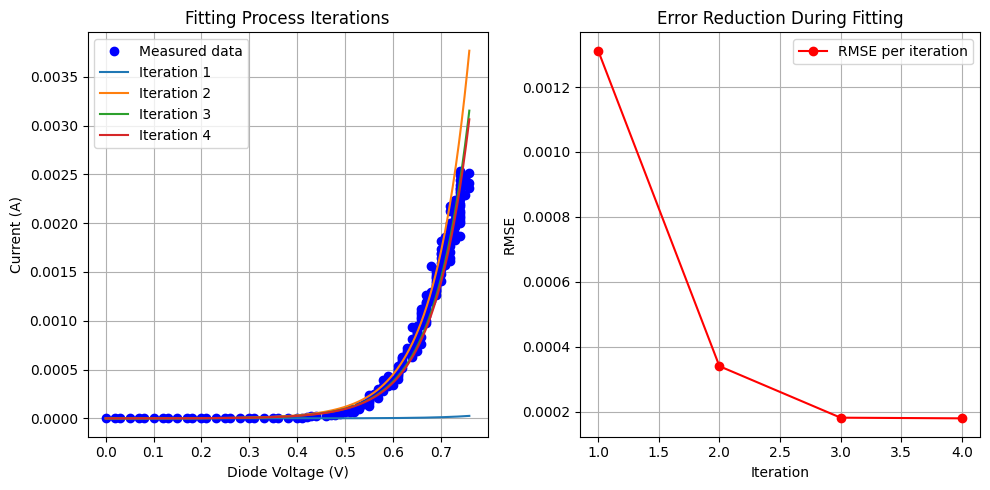

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Constants
Vt = 0.025  # Thermal voltage at room temperature (in Volts)
R = 1000    # 1kΩ resistor

# Step 1: Define the diode equation
def diode_equation(V_diode, I0, n):
    """
    Diode equation: I = I0 * (exp(V_diode / (n * Vt)) - 1)
    V_diode: Diode voltage
    I0: Reverse saturation current (A)
    n: Ideality factor
    Vt: Thermal voltage
    """
    return I0 * (np.exp(V_diode / (n * Vt)) - 1)

# Step 2: Calculate the diode voltage considering the resistor
def calculate_diode_voltage(voltage_measured, current):
    """
    Calculate the voltage drop across the diode, taking into account the resistor.
    """
    voltage_measured = np.array(voltage_measured)
    current = np.array(current)
    current_in_amps = current * 1e-3  # Convert mA to A
    V_diode = voltage_measured - current_in_amps * R
    return V_diode

# Step 3: Define a cost function for optimization
def cost_function(params, V_diode, current):
    """
    The cost function that calculates the error between the model and the measured data.
    """
    I0, n = params
    current_in_amps = current * 1e-3  # Convert mA to A
    model_current = diode_equation(V_diode, I0, n)
    error = np.sqrt(np.mean((current_in_amps - model_current) ** 2))  # RMSE
    return error

# Step 4: Optimization with logging of iterations and RMSE
def fit_and_iterate(V_diode, current, initial_guess):
    """
    Optimize the diode equation and log the parameters and RMSE at each iteration.
    """
    # Lists to capture the parameters and RMSE during optimization
    iteration_log = []
    error_log = []
    
    def callback(params):
        # Capture the current parameters and iteration
        iteration_log.append(params)
        current_rmse = cost_function(params, V_diode, current)
        error_log.append(current_rmse)
        print(f"Iteration: I0 = {params[0]:.2e}, n = {params[1]:.2f}, RMSE = {current_rmse:.2e}")

    # Perform the optimization using 'minimize' with L-BFGS-B method
    result = minimize(
        cost_function, initial_guess, args=(V_diode, current),
        method='L-BFGS-B', bounds=[(1e-9, 1e-1), (1, 3)],
        #callback=callback, options={'maxiter': 1000}
        callback=callback,
        options={'maxiter': 1000, 'ftol': 1e-12, 'gtol': 1e-12}  # Smaller tolerances
    )
    
    # Return the final result, the logged parameters, and the RMSE from iterations
    return result.x, iteration_log, error_log

# Step 5: Plot the fitting process and error reduction
def plot_fitting_process(V_diode, current, params_log, error_log):
    """
    Plot the measured data, the final fitted curve, and intermediate fits, along with the error.
    """
    current_in_amps = current * 1e-3  # Convert mA to A for plotting
    
    # Plot measured data
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(V_diode, current_in_amps, 'bo', label='Measured data')
    
    # Generate smooth V_diode values for plotting fitted curves
    V_diode_smooth = np.linspace(min(V_diode), max(V_diode), 1000)
    
    # Plot the fitting process by showing intermediate curves
    for i, params in enumerate(params_log):
        I0, n = params
        model_current = diode_equation(V_diode_smooth, I0, n)
        plt.plot(V_diode_smooth, model_current, label=f'Iteration {i+1}')
    
    plt.xlabel('Diode Voltage (V)')
    plt.ylabel('Current (A)')
    plt.title('Fitting Process Iterations')
    plt.legend()
    plt.grid(True)

    # Plot the error reduction over iterations
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(1, len(error_log) + 1), error_log, 'r-o', label='RMSE per iteration')
    plt.xlabel('Iteration')
    plt.ylabel('RMSE')
    plt.title('Error Reduction During Fitting')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Step 6: Run the fitting and visualize the iterations and error
def visualize_fitting_process(V_diode, current, initial_guess):
    """
    Run the fitting process and visualize how the parameters evolve and how the error decreases.
    """
    # Run the fitting process with the initial guess
    final_params, params_log, error_log = fit_and_iterate(V_diode, current, initial_guess)
    
    print(f"\nFinal fitted parameters: I0 = {final_params[0]:.2e}, n = {final_params[1]:.2f}")
    
    # Plot the measured data, fitting process, and error reduction
    plot_fitting_process(V_diode, current, params_log, error_log)

# Example process to show fitting
voltage = np.array(dac_voltage)  # Example input data for measured voltage
current = np.array(resistor_voltage)  # Example input data for measured current

# Step 1: Calculate the diode voltage
V_diode_trimmed = calculate_diode_voltage(voltage, current)

# Step 2: Visualize the fitting process with an initial guess
initial_guess = [1e-8, 1]  # Initial guess for I0 and n
visualize_fitting_process(V_diode_trimmed, current, initial_guess)